# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Jacopo De Stefani - __[Jacopo.De.Stefani@ulb.ac.be](mailto:Jacopo.De.Stefani@ulb.ac.be)__
### Théo Verhelst - __[Theo.Verhelst@ulb.ac.be](mailto:Theo.Verhelst@ulb.ac.be)__
### Gianluca Bontempi - __[gbonte@ulb.ac.be](mailto:gbonte@ulb.ac.be)__

## TP 4 - Predictions: Network-based methods

####  March 30,2021

#### Materials originally developed by *Bertrand Lebichot, Jacopo De Stefani and Gianluca Bontempi*

## Preliminaries

### Supervised learning

The process of supervised learning involves the presence of an entity (the learner, also called prediction model), whose goal is to learn the mapping between inputs and outputs in a given problem.

A supervised learning problem can formulated as follows:

\begin{equation*}
 y = m(\mathbf{x})  
\end{equation*}

where:
- $y$ represents the output variable (also called target)
- $\mathbf{x}$ represents the vector of inputs (also called features).
- $m$ is the (unknown) mapping between input and outputs.

In the majority of the supervised learning problems, the mapping $m$ between input and outputs is unknown and needs to be estimated on basis of the available input/output observation pairs $(\mathbf{x}_i,y_i)$.

## Classification vs regression

Both classification and regression are sub-fields of *supervised learning*. In the two cases, we have predictive variables $\mathbf{x}$ and a target variable $y$. 
The main difference betweet the two type of problems is the type of the target variabile:

- In classification, $y$ is a discrete variable; i.e $y \in \{C_1,\cdots,C_k\}$
- In regression, $y$ is a continuous variable; i.e $y \in \mathbb{R}$

In this practical, in order to better understand the classification process, we will tackle the simplest classification case, with $k=2$ possible output classes (called binary classification).

The goal of our approach is to be able to learn the mapping between the input features and the predefined discrete output classes, in order to be able to perform an automatic classification, based on the available data. 

## Classification with Neural Networks

In machine learning and cognitive science, an artificial neural network (ANN) is a network 
of interconnected processing elements, called neurons, which are used to estimate or approximate functions that can depend on a large number of inputs that are generally unknown.
The concept of artificial neural networks is inspired by the structure of the central nervous systems of animals, in particular the brain. 
In such biological neural networks, a set of units (i.e. the neurons) are interconnected with each other to form a data-processing network. The processing capability of the network depends on the strength of the connections between the neurons, which can be dynamically modified across time in response to external stimuli that the network is subject to.
This dynamic adaptation of the connections gives this system the possibility to learn from the experiences it is subject to.

Both artificial and neural networks are characterized by three features : **architecture**, **activity** and **learning rules**:

- The **architecture** is a specification of which input variables are involved in the network and what are the topological relationships between the nodes of the network.
- The **activity rule** describes defines how the activities of the neurons change in response to each other (usually with a short time-scale dynamics).
- The **learning rule** specifies the way in which the neural network's weights needs to be adapted with time. This learning is usually viewed as taking place on a longer time scale than the time scale of the dynamics under the activity rule. Usually the learning rule will depend on the activities of the neurons. It may also depend on the values of the target values supplied by a teacher.


For our task, we will focus on a specific family of artificial neural networks, the multi-layer perceptron (MLP). 
The **architecture** of a multi-layer perceptron is organized in layers, with each layer being fully connected to the following. The first layer, also called input layer, is constituted by the input variables. Following it there are one or more intermediate layers, named hidden layers, yielding to an output layer with one output variable. In this type of network, information moves from the input nodes, through the hidden nodes, to the output node. Moreover, every connection between nodes has an associated weight.

In the following, we will focus on a standard one-hidden layer network:
![](ANN_FF.png)

Described by the equation :
\begin{equation}
m(\mathbf{x}) = f_o \left( b_o + \sum_{j=1}^{|H|} w_{jo} \cdot f_h \left( \sum_{k=1}^{|I|} w_{ik} x_{ik} + b_j  \right) \right)
\end{equation}


where $\mathbf{x'}$ is the input vector $\mathbf{x}$, augmented with 1, i.e., $\mathbf{x'}= (1;\mathbf{x}^T)^T$ , 
$w_{ij}$ is the weight of the connection between the $i^\text{th}$ input node and the $j^\text{th}$ hidden node, $w_{jo}$ are the weights of the connections between hidden node $j$ and the output node and $|H|$ is the number of hidden nodes. The number of hidden nodes ($|H|$) controls the complexity of the model. 


The **activation rule** of such network is divided into two steps.
Firstly, each node $j$ determines its activation $a_j$, by collecting the output of its input nodes:
\begin{equation}
a_j = \sum_{i} w_{ij} x_i 
\end{equation}
Then, the *activity* of the neuron is computed as a function of the value of the activation $a_j$. In the case of the considered network, we have two different activity functions: $f_h(\cdot)$ for the hidden layer and $f_o(\cdot)$ for the output node.
Common choices for activity functions are:

\begin{align*}
f(x) = x && \text{Linear} \\
f(x) = \frac{1}{1+e^{-x}} && \text{Logistic} \\
f(x) = \tanh(x) && \text{Hyperbolic tangent} \\
f(x) = 
\begin{cases}
1 & x > 0 \\
-1 & x \le 0 \\
\end{cases} && \text{Threshold} \\
\end{align*}


Concerning the **learning rule**, the weights are generally estimated using some specific
optimization procedure, the most popular one being the backpropagation procedure. Usually, at the beginning, the weights are chosen to be random values near zero and the backpropagation procedure updates the weights in order to minimize the prediction errors. The backpropagation procedure could be done using all the available data in a single session (batch training) or providing the network one training example at a time (online training).
The error function minimized by neural networks is nonconvex and so can have multiple local
minima. In consequence, the final solution will depend on the value chosen as starting point.
Because of this randomness, neural networks are often trained multiple times using different
random starting values, and the outputs of the different networks are averaged to obtain the final predictions.


## Dataset

The chosen database is about spam detection. Details can be found here :
https://archive.ics.uci.edu/ml/datasets/spambase

To import the dataset, just use package ''kernlab''

`install.packages("kernlab")`

In case of doubts, always remember that R can provide you with the documentation of a function package/using the following syntax:
`? name_of_function` or `help(name_of_function)` 

In [1]:
options(repr.plot.width=20, repr.plot.height=10)
library(nnet)
library(devtools)
library(RSNNS)
library(kernlab)
data(spam)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')


Warning message:
"package 'devtools' was built under R version 4.0.4"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 4.0.4"
Warning message:
"package 'RSNNS' was built under R version 4.0.5"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.0.4"
SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d



In [2]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
    if(dim(confusion_matrix)[1] < 2){ 
       if(rownames(confusion_matrix) == "nonspam"){
           confusion_matrix <- rbind(confusion_matrix,c(0,0))
           rownames(confusion_matrix)[2] <- "spam"
       }
       if(rownames(confusion_matrix) == "spam"){
           confusion_matrix <- rbind(c(0,0),confusion_matrix)
           rownames(confusion_matrix)[1] <- "nonspam"
       }
    }
    return((confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix))
}


computeResults <- function(Y,Y_hat,explanatory_string="",verbose=TRUE){
    
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracyFromConfusionMatrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    
    return(accuracy)
}



## Data analysis

In [3]:
spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]
threshold <- 0.5


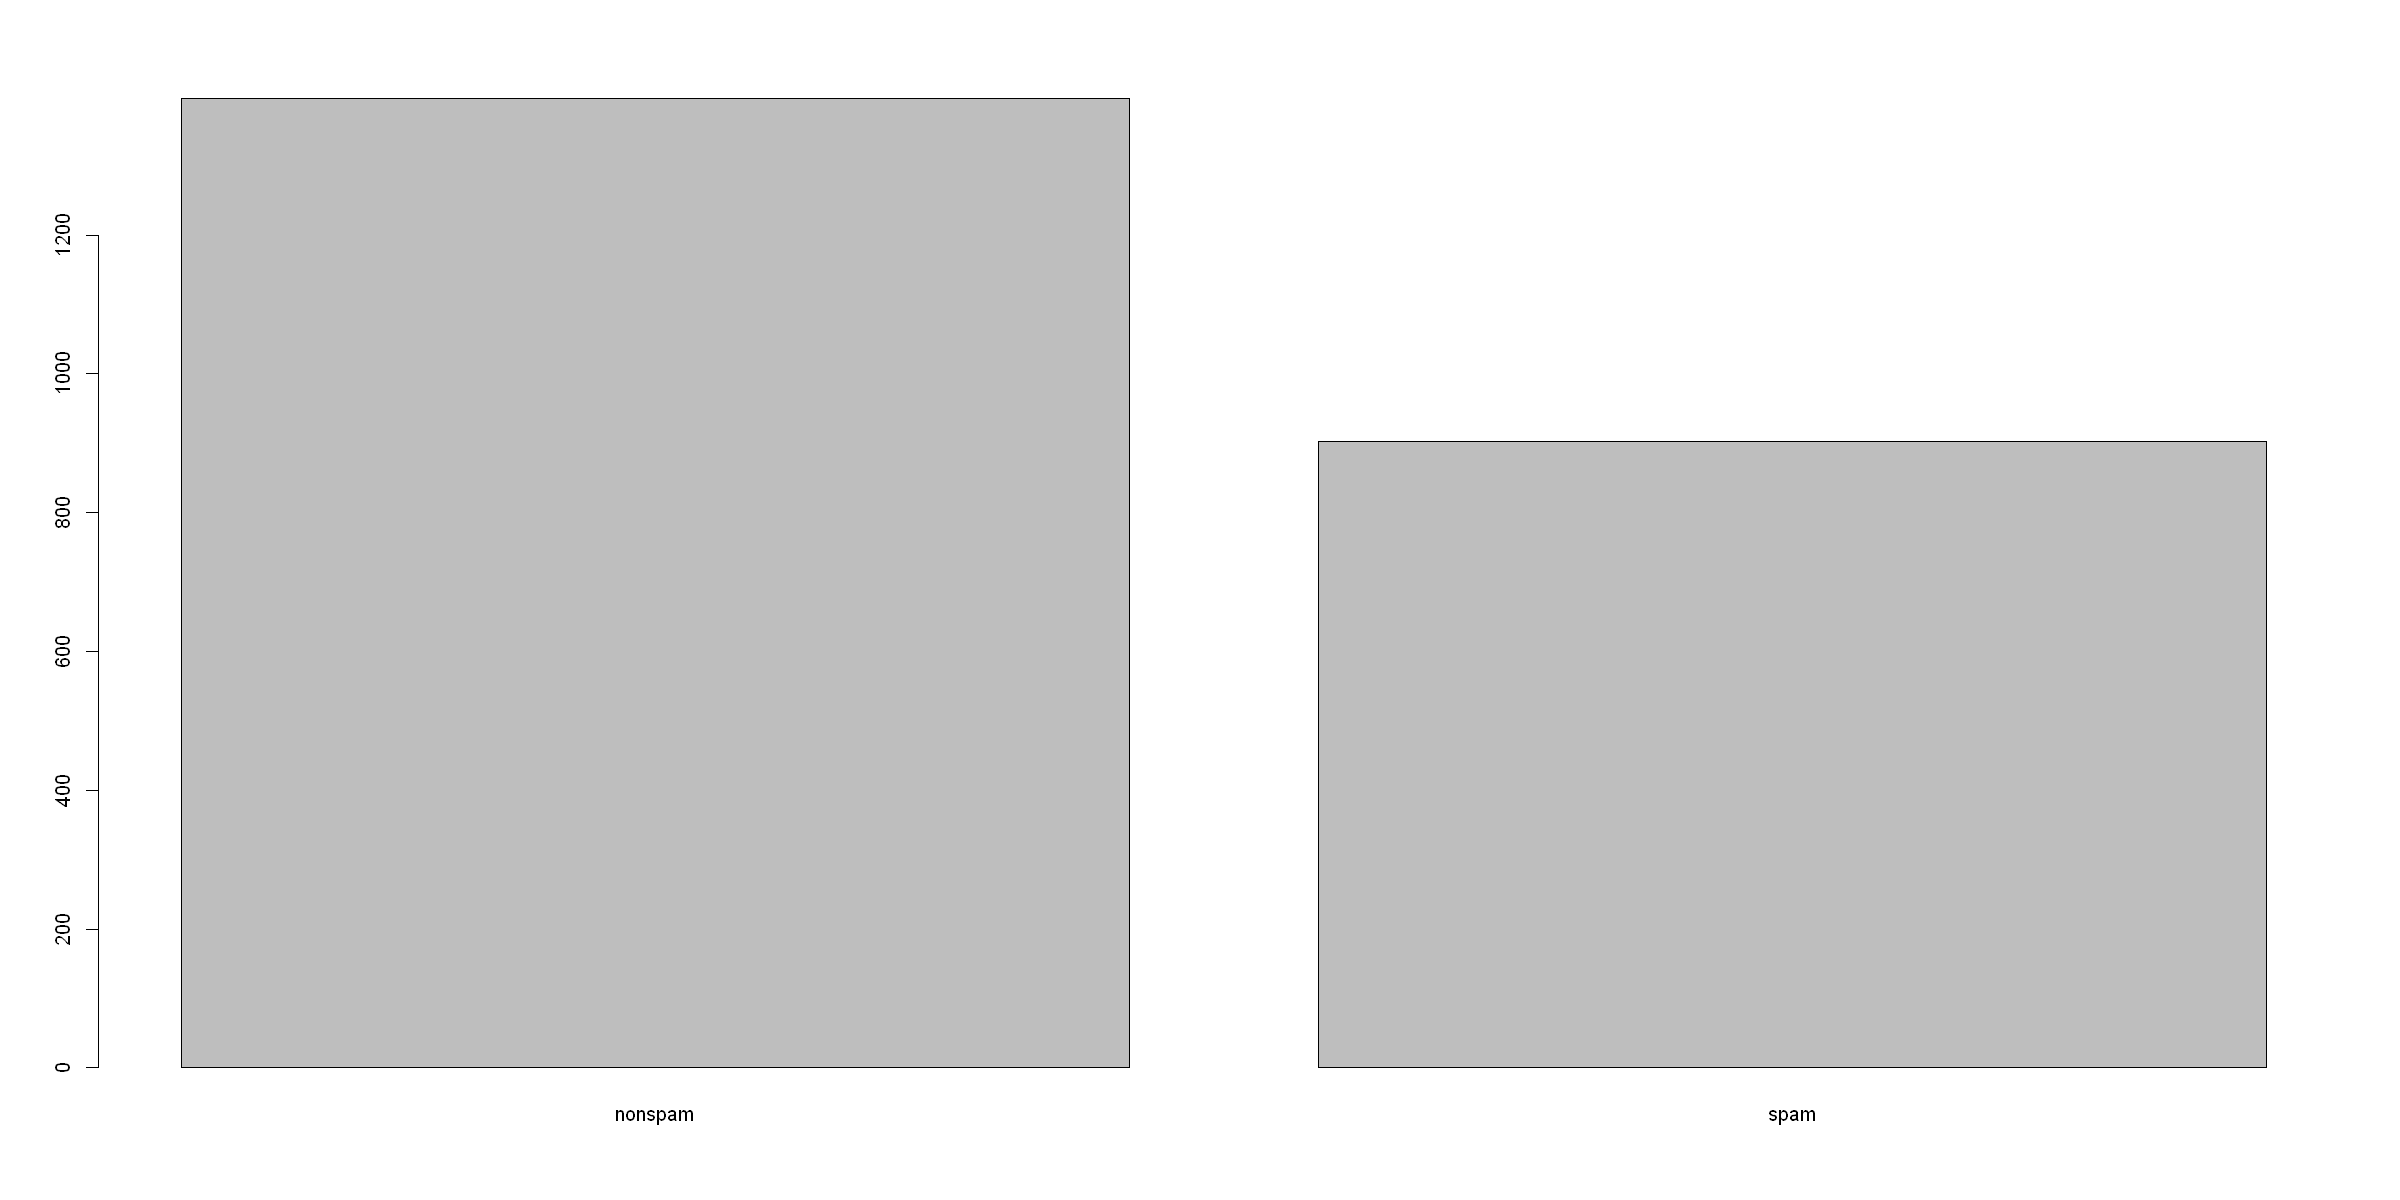

In [4]:
barplot(table(train_data[,target_variable]))

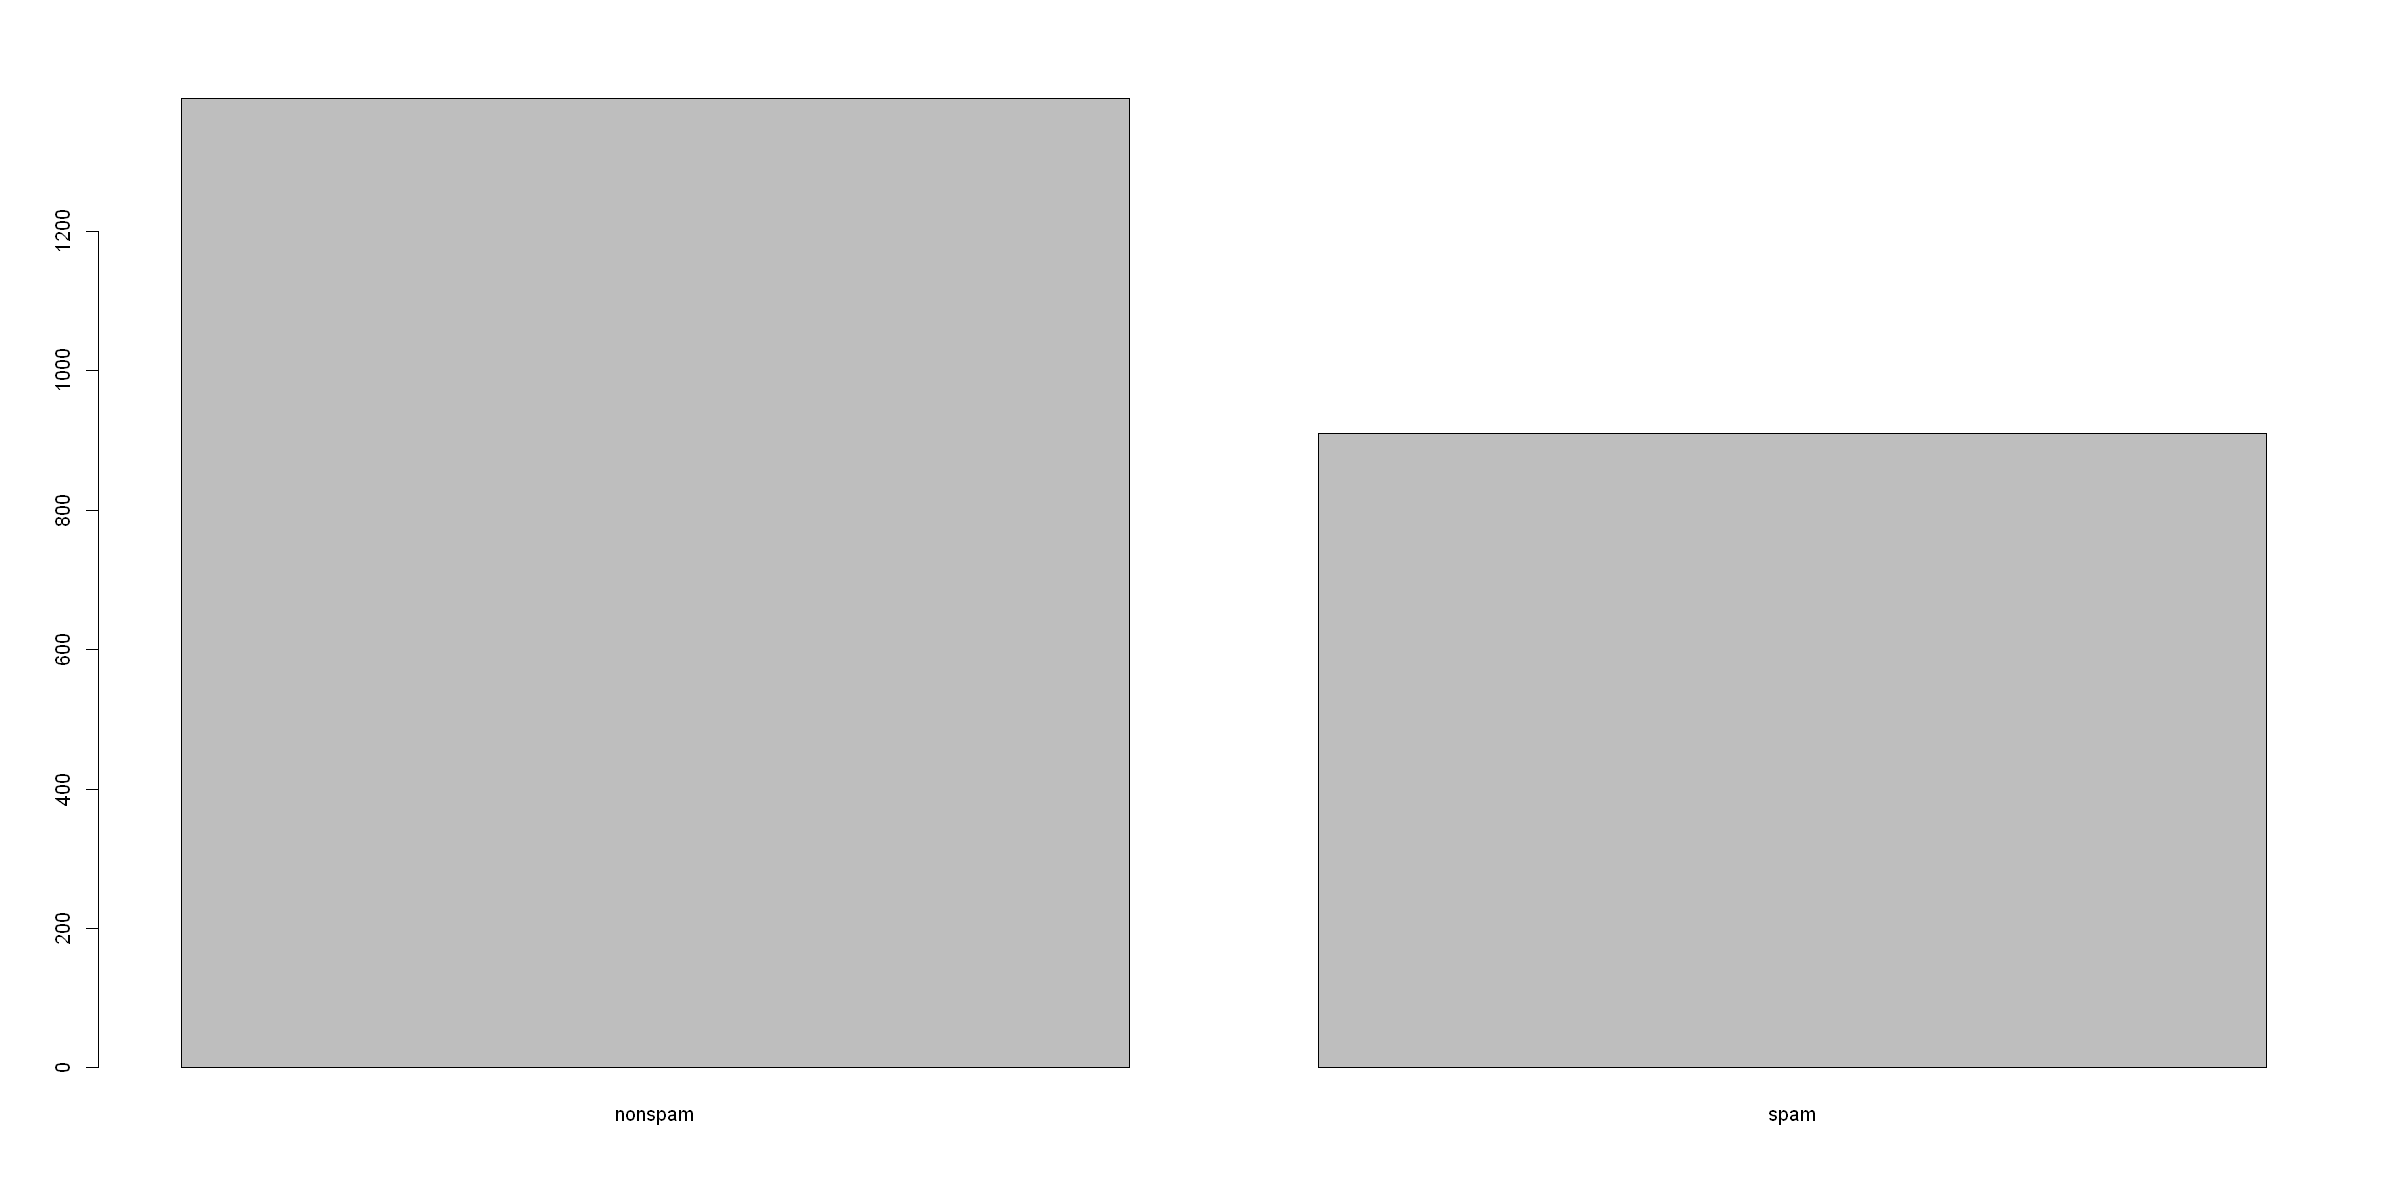

In [5]:
barplot(table(test_data[,target_variable]))

Before starting with the implementation of the models, we will have a deeper look into the data. To be more precise, we will focus on the target variable ``type``.

In [6]:
class(train_data[,target_variable])

[1] "factor"

As the target variable is a categorical variable (i.e. a variable taking values from a fixed and limited set of values), neural networks cannot naturally deal with values that are not numeric.

We than have two different possibilities to solve this issue:

- **integer encoding** : Each category will be coded with an increasing integer number (e.g. 1,2,3,....)
    - **Pro's** : Efficient encoding (especially with a large number of variables)
    - **Con's** : Natural relation among coded values
- **one-hot encoding** : Each category will be coded with an vector having a number of entries equal to the available categories
    - **Pro's** : No relation among coded values
    - **Con's** : Potentially high number of dummy output variables need to be added to the model

In [7]:
print("Integer encoding of is_spam:")
head(train_data[,target_variable])
print("One-hot encoding of is_spam:")
head(class.ind(as.factor(train_data[,target_variable])))

[1] "Integer encoding of is_spam:"


[1] spam    spam    spam    nonspam spam    nonspam
Levels: nonspam spam

[1] "One-hot encoding of is_spam:"


nonspam,spam
0,1
0,1
0,1
1,0
0,1
1,0


### MLP - Single output network

We will start by applying a multi layer perceptron to our problem.
The input layer will be constituted by 57 neurons, one for each input variable in the Spambase dataset.
The output layer will contain a single neuron, outputting the probability for the given input example, to be classified as spam.
The hidden layer will be constituted by a given number (``hidden_neurons <- 5``) of hidden units.
The objective of the **learning rule** here, is to tune the weights of the network in order to minimize the mean squared difference between the output of the network $\hat{y}$ and the true values $y$.

In [8]:
hidden_nodes <- 5

model_single_out <- nnet(type ~ ., data=train_data,size=hidden_nodes,skip=FALSE,trace=T, maxit=3000,rang=0.2)
model_single_out

Y_pred<-predict(model_single_out,test_data[,-target_variable])
Y_hat_single_out <- ifelse(Y_pred > threshold,"spam","nonspam") 

head(Y_pred)

# weights:  296
initial  value 1575.372467 
iter  10 value 973.161954
iter  20 value 775.435920
iter  30 value 510.992135
iter  40 value 407.348486
iter  50 value 356.178554
iter  60 value 328.882332
iter  70 value 319.786303
iter  80 value 299.700093
iter  90 value 274.506521
iter 100 value 266.397956
iter 110 value 255.364849
iter 120 value 242.387936
iter 130 value 230.672777
iter 140 value 223.304080
iter 150 value 213.680642
iter 160 value 203.975558
iter 170 value 195.325085
iter 180 value 187.578737
iter 190 value 185.536550
iter 200 value 183.090647
iter 210 value 182.930950
final  value 182.930706 
converged


a 57-5-1 network with 296 weights
inputs: make address all num3d our over remove internet order mail receive will people report addresses free business email you credit your font num000 money hp hpl george num650 lab labs telnet num857 data num415 num85 technology num1999 parts pm direct cs meeting original project re edu table conference charSemicolon charRoundbracket charSquarebracket charExclamation charDollar charHash capitalAve capitalLong capitalTotal 
output(s): type 
options were - entropy fitting 

1438,9.601380e-01
3559,9.601380e-01
255,9.601380e-01
4294,9.601380e-01
4352,1.410642e-05
2736,1.410642e-05


We will then use a custom function (cf. https://beckmw.wordpress.com/2013/03/04/visualizing-neural-networks-from-the-nnet-package/) to visualize the fitted network

Loading required package: scales

Warning message:
"package 'scales' was built under R version 4.0.4"

Attaching package: 'scales'


The following object is masked from 'package:kernlab':

    alpha


Loading required package: reshape

Warning message:
"package 'reshape' was built under R version 4.0.4"


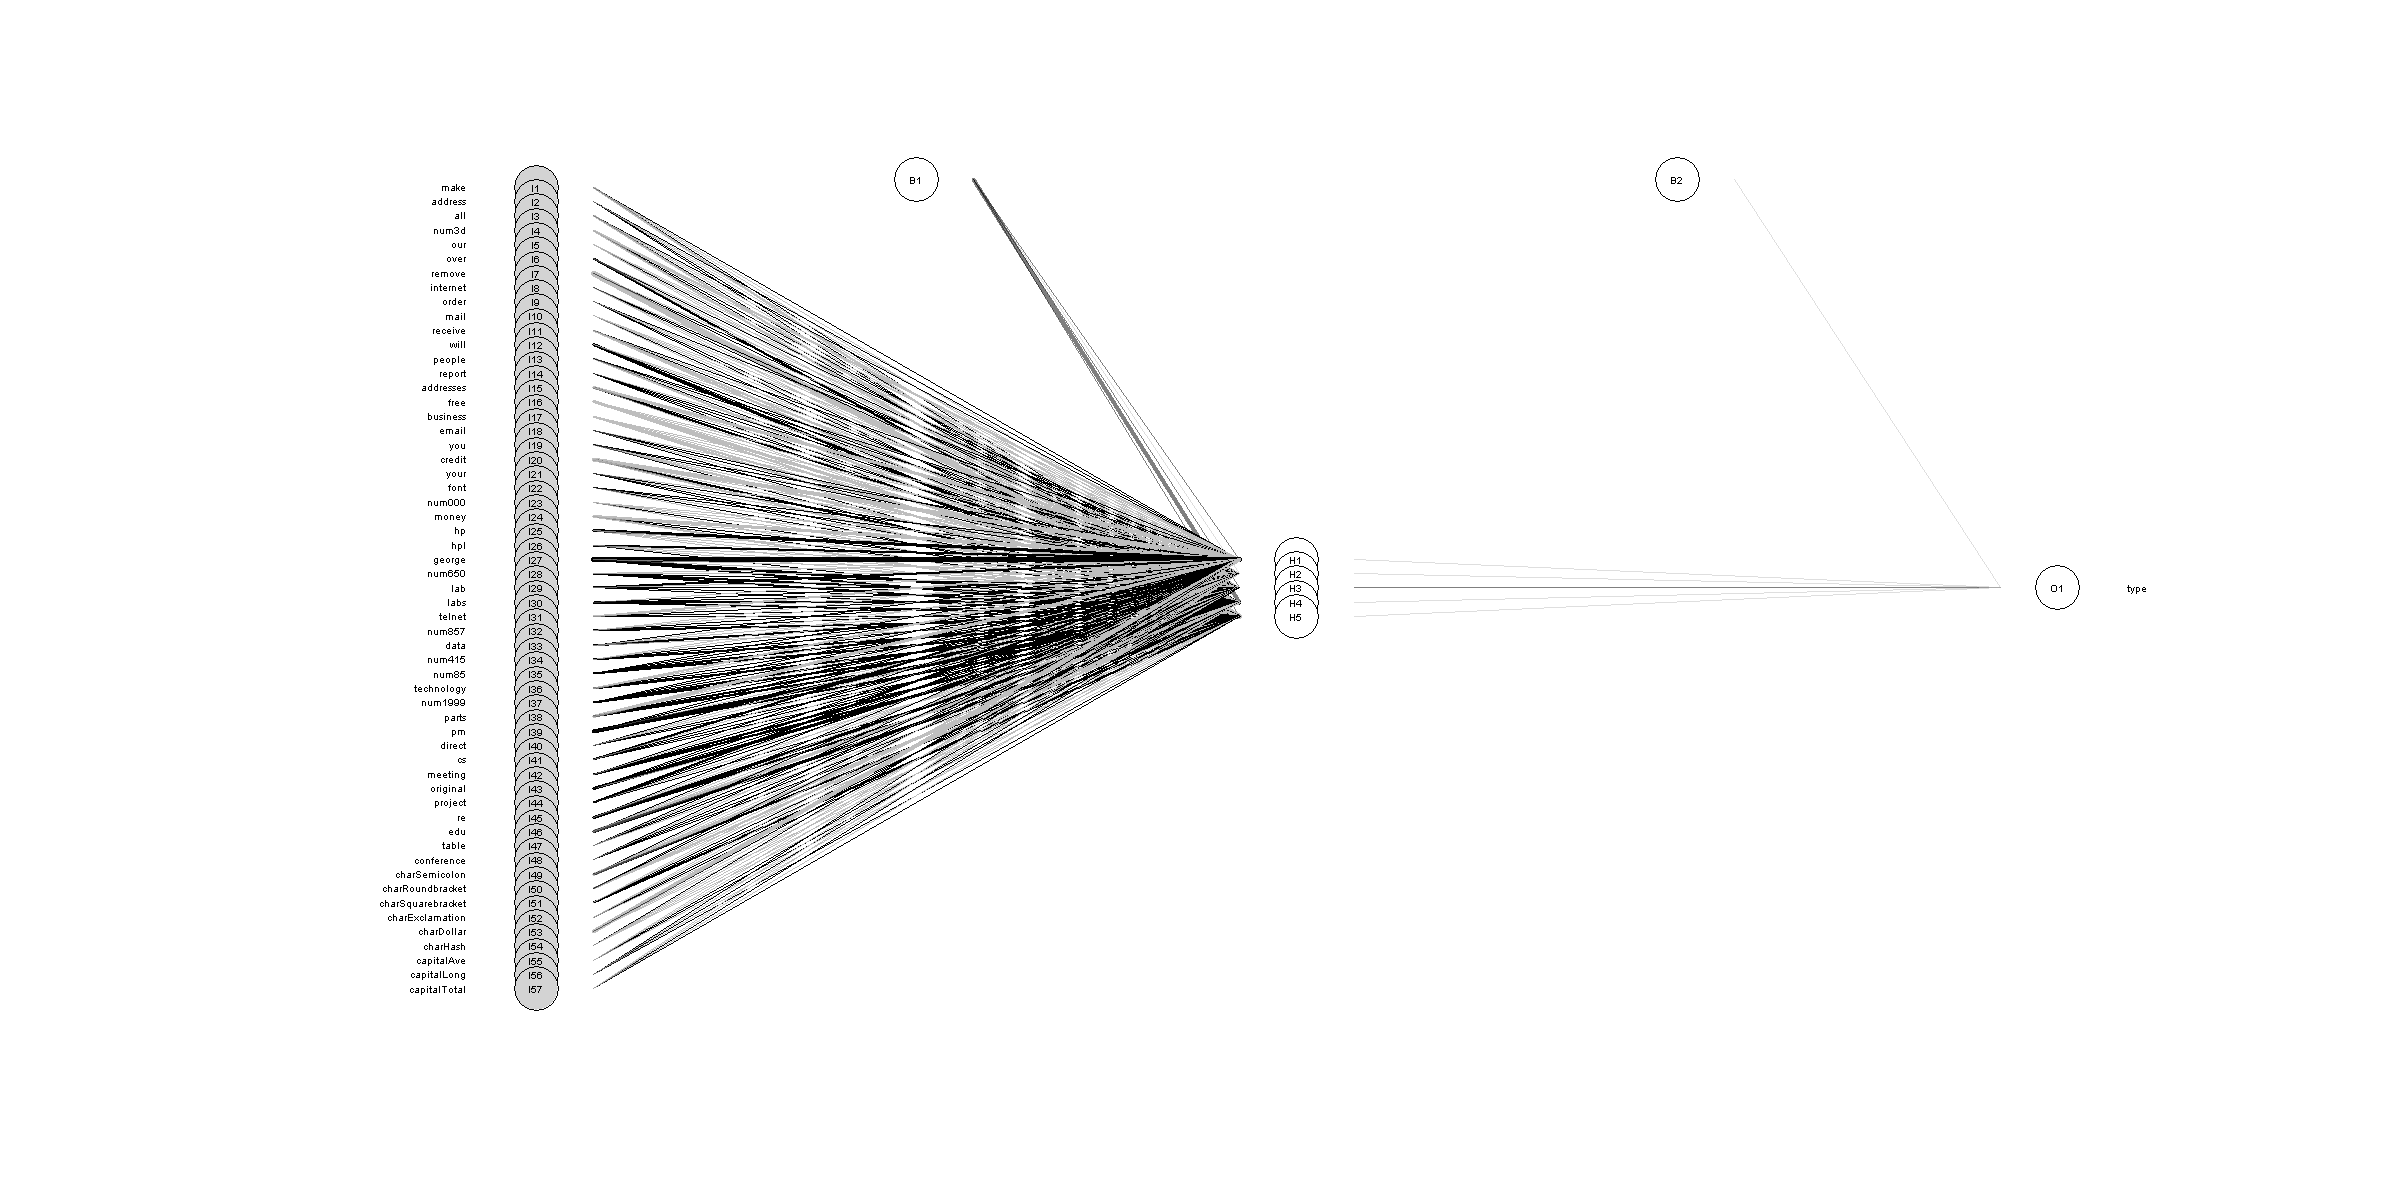

In [9]:
plot.nnet(model_single_out, alpha.val = 0.5, circle.col = list('lightgray', 'white'), bord.col = 'black', cex=0.5)

### MLP - One hot encoding network

In [10]:
model_one_hot<-nnet(x=train_data[,-target_variable],
               y=class.ind(as.factor(train_data[,target_variable])),
               size=hidden_nodes,
               skip=FALSE,
               trace=T, 
               maxit=1000,
               rang=0.5)

model_one_hot

Y_pred<-predict(model_one_hot,test_data[,-target_variable])
Y_hat_one_hot <- ifelse(Y_pred[,2] > threshold,"spam","nonspam")

head(Y_pred)

# weights:  302
initial  value 1240.810200 
iter  10 value 1041.217465
iter  20 value 828.374967
iter  30 value 530.523711
iter  40 value 239.143733
iter  50 value 190.450472
iter  60 value 159.445350
iter  70 value 136.650140
iter  80 value 120.763979
iter  90 value 106.444572
iter 100 value 97.193285
iter 110 value 93.956800
iter 120 value 91.518470
iter 130 value 89.464701
iter 140 value 88.047370
iter 150 value 87.449329
iter 160 value 87.022034
iter 170 value 86.815831
iter 180 value 86.586706
iter 190 value 86.384460
iter 200 value 86.275981
iter 210 value 86.194093
iter 220 value 86.141582
iter 230 value 86.074705
iter 240 value 86.013890
iter 250 value 85.928452
iter 260 value 85.830047
iter 270 value 85.791228
iter 280 value 85.761931
iter 290 value 85.732268
iter 300 value 85.710237
iter 310 value 85.700462
iter 320 value 85.689824
iter 330 value 85.666405
iter 340 value 85.641941
iter 350 value 85.611898
iter 360 value 85.571170
iter 370 value 85.530517
iter 380 value 85.506

a 57-5-2 network with 302 weights
options were -

,nonspam,spam
1438,0,1
3559,1,0
255,0,1
4294,1,0
4352,1,0
2736,1,0


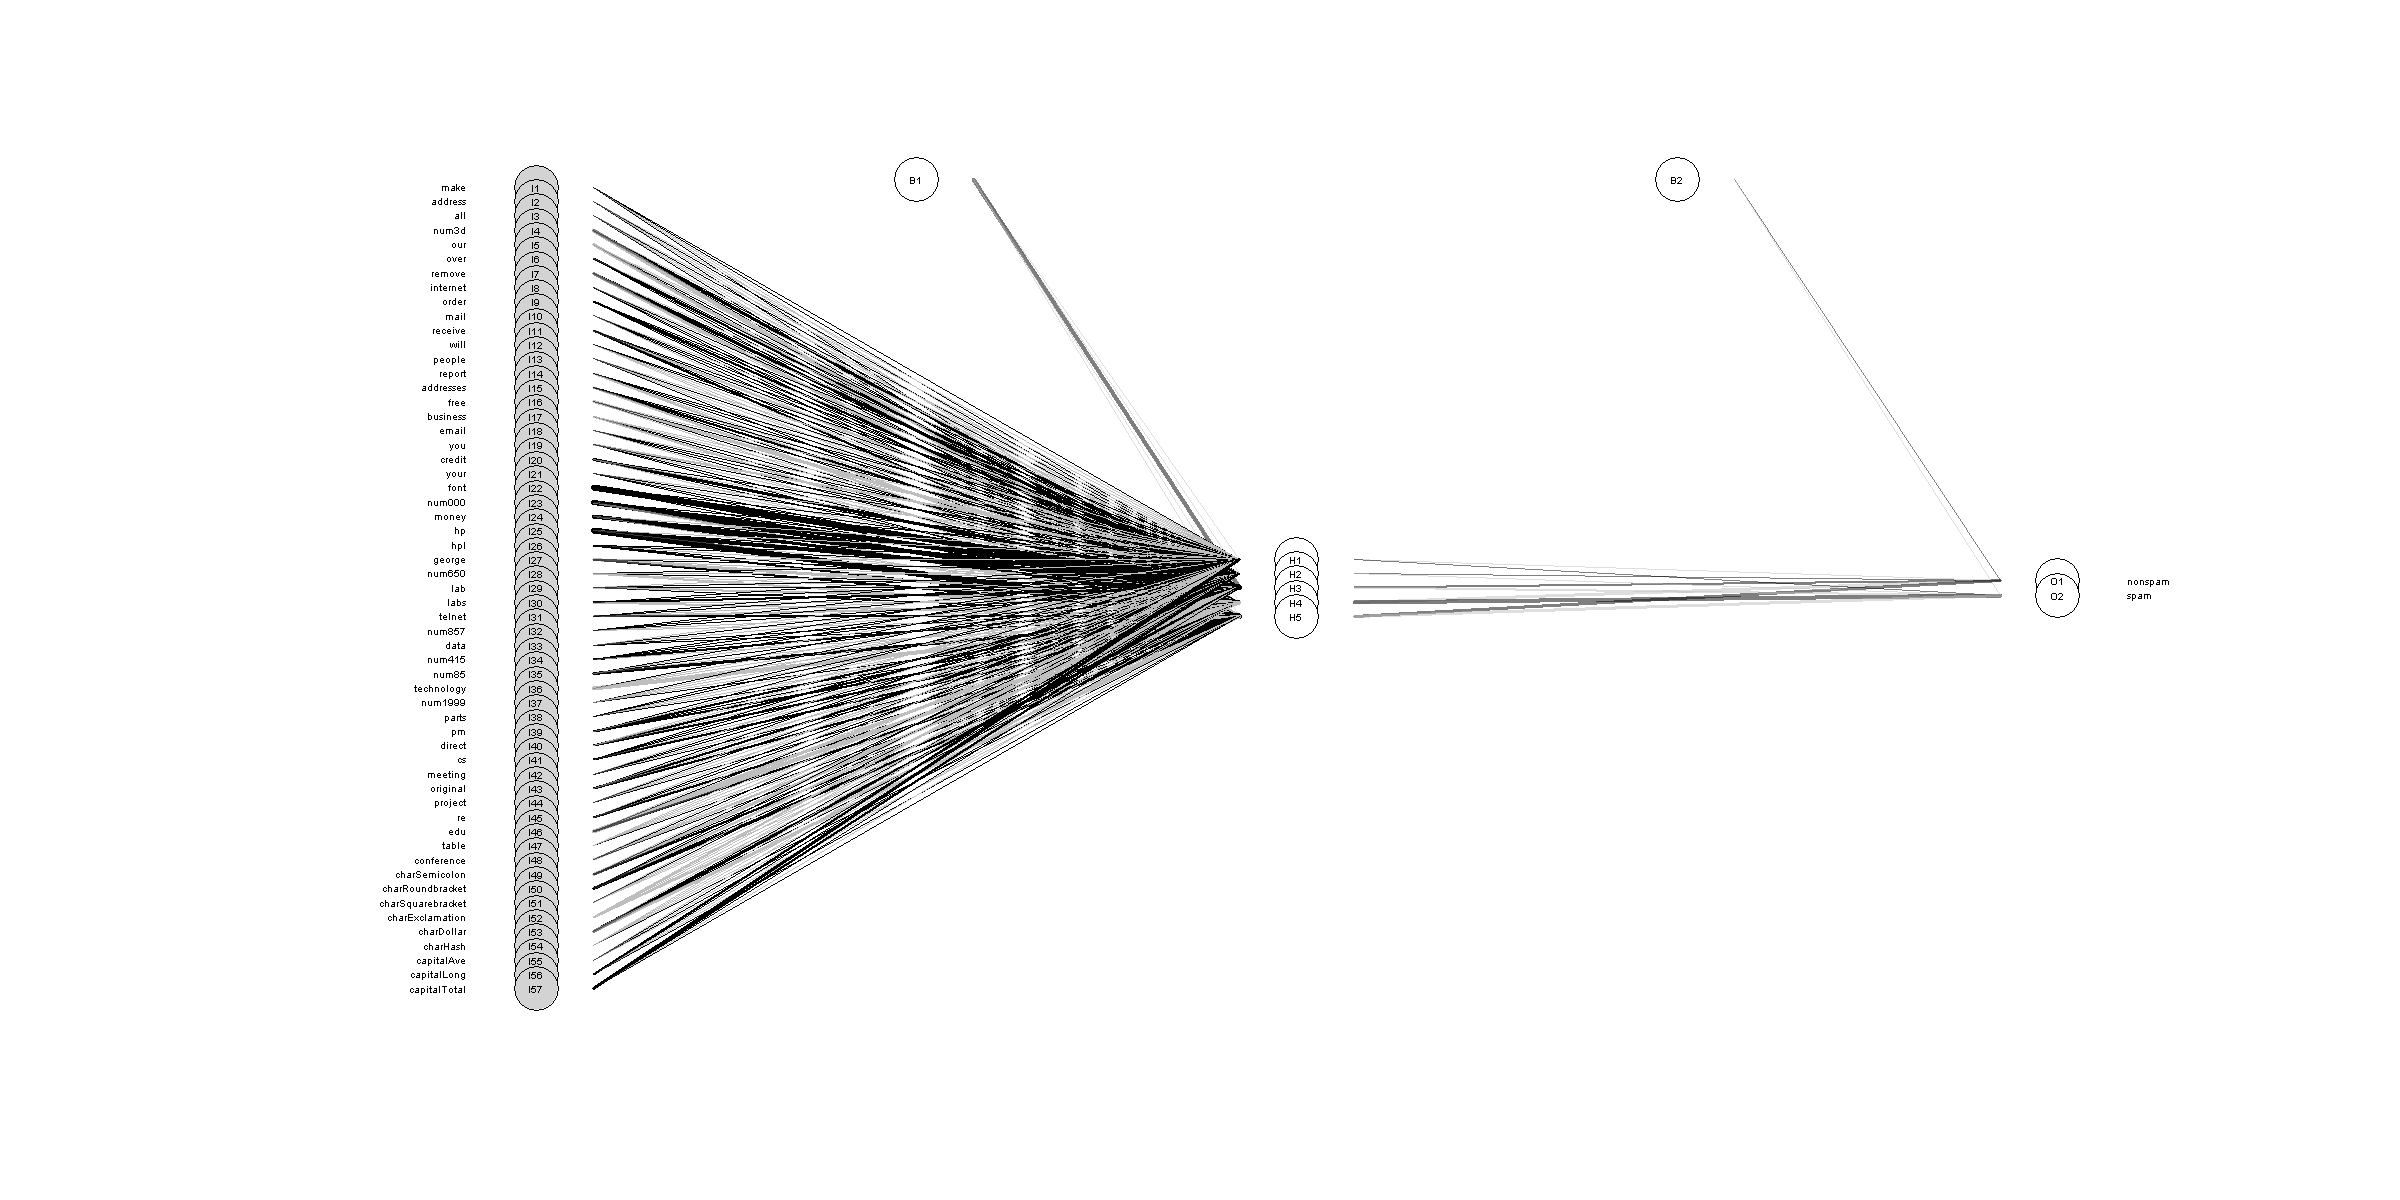

In [11]:
plot.nnet(model_one_hot, alpha.val = 0.5, circle.col = list('lightgray', 'white'), bord.col = 'black', cex=0.5)

In [12]:
Y <- test_data[,target_variable]

computeResults(Y,Y_hat_single_out,"Single out")
computeResults(Y,Y_hat_one_hot,"One hot")


[1] "[INFO] - Confusion matrix Single out :"
         Y
Y_hat     nonspam spam
  nonspam    1291   55
  spam        100  855
[1] "[INFO] - Accuracy Single out : 0.932637983485441"
[1] "[INFO] - Misclassification rate Single out : 0.0673620165145589"


[1] 0.932638

[1] "[INFO] - Confusion matrix One hot :"
         Y
Y_hat     nonspam spam
  nonspam    1286   67
  spam        105  843
[1] "[INFO] - Accuracy One hot : 0.925249891351586"
[1] "[INFO] - Misclassification rate One hot : 0.0747501086484137"


[1] 0.9252499

### Questions
- Does the type of encoding affect the quality of the classifiers?
- What does the $B_i$ nodes represent?
- Does the number of hidden neurons affect the quality of the prediction?
- If so, how?

## k-fold crossvalidation

As the convergence of neural networks is highly influenced by the initial choice of weights, togheter with the choice of the optimization algorithm, it will be interesting to how the choice of these parameters will influence the performances of the model.  

In order to do so, we ask you to implement $k$-fold cross validation and to compare:

- In-sample error
- Out-of-sample error
- Crossvalidation error

for a varying number of hidden nodes $\in \{3,5,10,15,20\}$.

In [13]:
crossValidationInOutSample <- function(hidden_nodes=5,k=10,threshold=0.5){
    data(spam)
    target_variable <- ncol(spam)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    spam_idx <- sample(1:nrow(spam))
    half_split <- floor(nrow(spam)/2)
    target_variable <- ncol(spam)
    
    # 2. Split the dataset into k groups
    max <- ceiling(nrow(spam)/k)
    splits <- split(spam_idx, ceiling(seq_along(spam_idx)/max))

    # 3. For each unique group:
    for (i in 1:k){
        #3.1 Take the group as a hold out or test data set
        train_data <- spam[-splits[[i]],]

        #3.2 Take the remaining groups as a training data set
        test_data <- spam[splits[[i]],]
        print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #3.3 Fit a model on the training set and evaluate it on the test set
        model_single_out <- nnet(type ~ ., data=train_data,size=hidden_nodes,
                                 skip=FALSE, maxit=3000,rang=0.2,MaxNWts=10000,trace=FALSE)

        Y_pred<-predict(model_single_out,test_data[,-target_variable])

        Y <- test_data[,target_variable]
        Y_hat <- ifelse(Y_pred > threshold,"spam","nonspam")
        confusion_matrix <- table(Y_hat,Y)
        
        #3.4 Retain the evaluation score and discard the model
        accuracy_vec[i] = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
        misclassification_rate = 1 - accuracy_vec[i]
        print(paste("[INFO] - Misclassification rate -",i,"fold:",misclassification_rate))
    }

    # 4.1 Summarize the skill of the model using the sample of model evaluation scores
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    
    # 4.2 Split training-test for in/out of sample predictions
    train_data <- spam[spam_idx[1:half_split],]
    test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]
    Y <- test_data[,target_variable]

    model_single_out <- nnet(type ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=300,rang=0.2,MaxNWts=10000)
    model_single_out

    # 4.2 - In sample evaluation error computation
    Y_pred<-predict(model_single_out,train_data[,-target_variable])
    Y_hat_single_out_in_sample <- ifelse(Y_pred > threshold,"spam","nonspam")

    # 4.2 - Out of sample evaluation error computation
    Y_pred<-predict(model_single_out,test_data[,-target_variable])
    Y_hat_single_out_out_sample <- ifelse(Y_pred > threshold,"spam","nonspam")

    accuracy_in_sample <- computeResults(train_data[,target_variable],Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- computeResults(Y,Y_hat_single_out_out_sample,"Out sample")
    
    return(list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample,cv=mean(accuracy_vec)))
}

In [14]:
k <- 2
hidden_nodes_vec <- c(3,5,10,15,30,50,100)

error_in_sample_vec <- numeric()
error_out_sample_vec <- numeric()
error_cv_vec <- numeric()

for(hidden_nodes in hidden_nodes_vec){
    print(paste("[INFO] - Testing h=",hidden_nodes))
    results <- crossValidationInOutSample(hidden_nodes=hidden_nodes,k=k)
    error_in_sample_vec <- c(error_in_sample_vec,results$in_sample)
    error_out_sample_vec <- c(error_out_sample_vec,results$out_sample)
    error_cv_vec <- c(error_cv_vec,results$cv)
}

[1] "[INFO] - Testing h= 3"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Misclassification rate - 1 fold: 0.0682312038244242"
[1] "[INFO] - Training set size: 2301 - Testing set size 2300"
[1] "[INFO] - Misclassification rate - 2 fold: 0.0630434782608695"
[1] "[INFO] - CV - Mean misclassification rate: 0.0656373410426468"
[1] "[INFO] - Confusion matrix In sample :"
         Y
Y_hat     nonspam spam
  nonspam    1302   59
  spam         87  853
[1] "[INFO] - Accuracy In sample : 0.936549326379835"
[1] "[INFO] - Misclassification rate In sample : 0.0634506736201651"
[1] "[INFO] - Confusion matrix Out sample :"
         Y
Y_hat     nonspam spam
  nonspam    1287   83
  spam        112  818
[1] "[INFO] - Accuracy Out sample : 0.915217391304348"
[1] "[INFO] - Misclassification rate Out sample : 0.0847826086956521"
[1] "[INFO] - Testing h= 5"
[1] "[INFO] - Training set size: 2300 - Testing set size 2301"
[1] "[INFO] - Misclassification rate - 1 fold: 0.0660582

In [17]:
save(error_in_sample_vec,error_out_sample_vec,error_cv_vec,file="Ex1_Results_CV.Rdata")

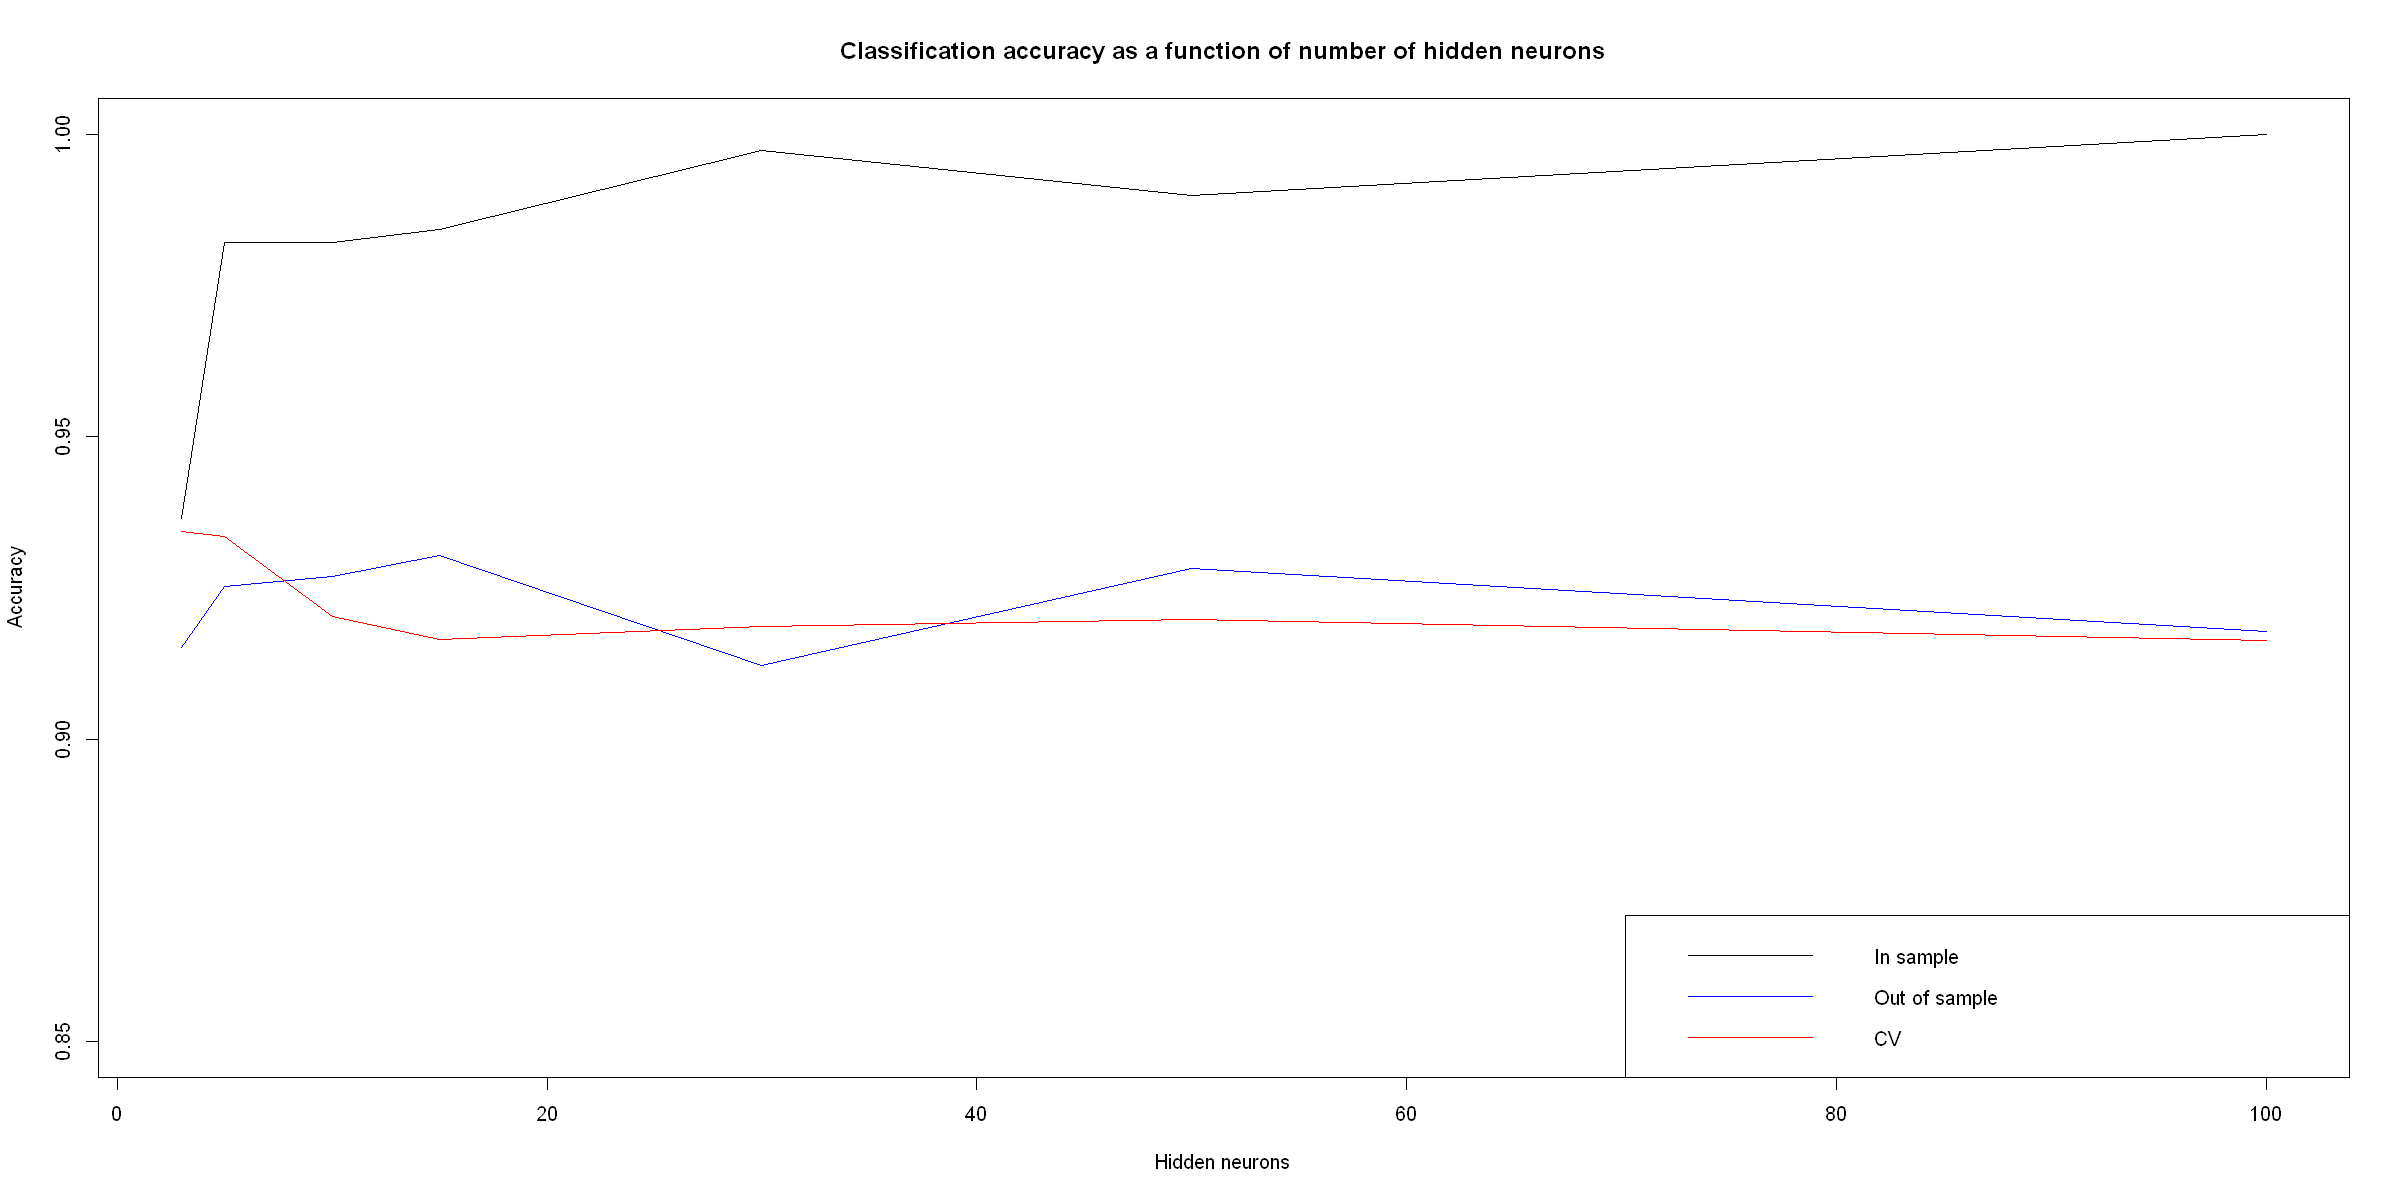

In [18]:
load("Ex1_Results_CV.Rdata")
plot(hidden_nodes_vec,error_in_sample_vec,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy",ylim=c(0.85,1))
lines(hidden_nodes_vec,error_in_sample_vec)
lines(hidden_nodes_vec,error_out_sample_vec,col="blue")
lines(hidden_nodes_vec,error_cv_vec,col="red")
legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))

## Bagging Neural Networks

Given a standard training set $D$ of size $n$, bagging generates $m$ new training sets $D_i$, each of size $n′$, by sampling from $D$ uniformly and with replacement. By sampling with replacement, some observations may be repeated in each $D_{i}$
Bagging leads to "improvements for unstable procedures" (Breiman, 1996), which include, for example, artificial neural networks, classification and regression trees. On the other hand, it can mildly degrade the performance of stable methods such as K-nearest neighbors (Breiman, 1996).

We would like to study the impact of bagging on the problem at hand.
In order to do so you have to:

- Develop a basic (50/50 split) neural network model
- Develop a bagged version of the same model
- Compare (through tables and/or plots) the perfomances of the models

In [19]:
BaggingNN <- function(hidden_nodes=5,n_bagging_resamples=10,threshold=0.5){
    data(spam)
    half_split <- floor(nrow(spam)/2)
    target_variable <- ncol(spam)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    spam_idx <- sample(1:nrow(spam))
    
    # 2. Split shuffled dataset into training and test set
    train_data <- spam[spam_idx[1:half_split],]
    test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]

    n_train <- nrow(train_data)
    Y_pred_models<-numeric()
    Y_hat_bagged<-array(0,c(length(test_data),1))
    Y <- test_data[,target_variable]
    accuracy_vec<-array(0,c(1,n_bagging_resamples))

    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
      model <- nnet (type ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=50,trace=F,rang=0.2,MaxNWts=10000)
      Y_pred <- predict(model,test_data[,-target_variable])
      Y_pred_models <- cbind(Y_pred_models,ifelse(Y_pred > threshold,1,0))
      accuracy_vec[i] <- computeResults(Y,ifelse(Y_pred > threshold,"spam","nonspam"),paste(i,"th model"),verbose=F)
    }
    
    Y <- test_data[,target_variable]

    # 3. Majority vote of the classifiers to make the prediction
    # Computation trick : With classes being 0/1 if there is a majority of 1 classes, 
    # the sum of all the values should be greater than the number of models/2
    Y_pred_bagged <- as.numeric(apply(Y_pred_models,1,sum) > (n_bagging_resamples/2))

    #Y_pred_bagged <- apply(Y_pred_models,1,mean)
    Y_hat_bagged <- ifelse(Y_pred_bagged,"spam","nonspam")
    accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model")
    
    
    model_single_out <- nnet(type ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=300,rang=0.2,MaxNWts=10000)
    Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
    Y_hat_single_out <- ifelse(Y_pred_single_out > threshold,"spam","nonspam")
    accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
    return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec))
}

In [24]:
results <- BaggingNN(hidden_nodes = 5,n_bagging_resamples = 100)

[1] "[INFO] - Confusion matrix bagged model :"
         Y
Y_hat     nonspam spam
  nonspam    1201  173
  spam        196  731
[1] "[INFO] - Accuracy bagged model : 0.839634941329857"
[1] "[INFO] - Misclassification rate bagged model : 0.160365058670143"
[1] "[INFO] - Confusion matrix single model :"
         Y
Y_hat     nonspam spam
  nonspam    1317   66
  spam         80  838
[1] "[INFO] - Accuracy single model : 0.936549326379835"
[1] "[INFO] - Misclassification rate single model : 0.0634506736201651"


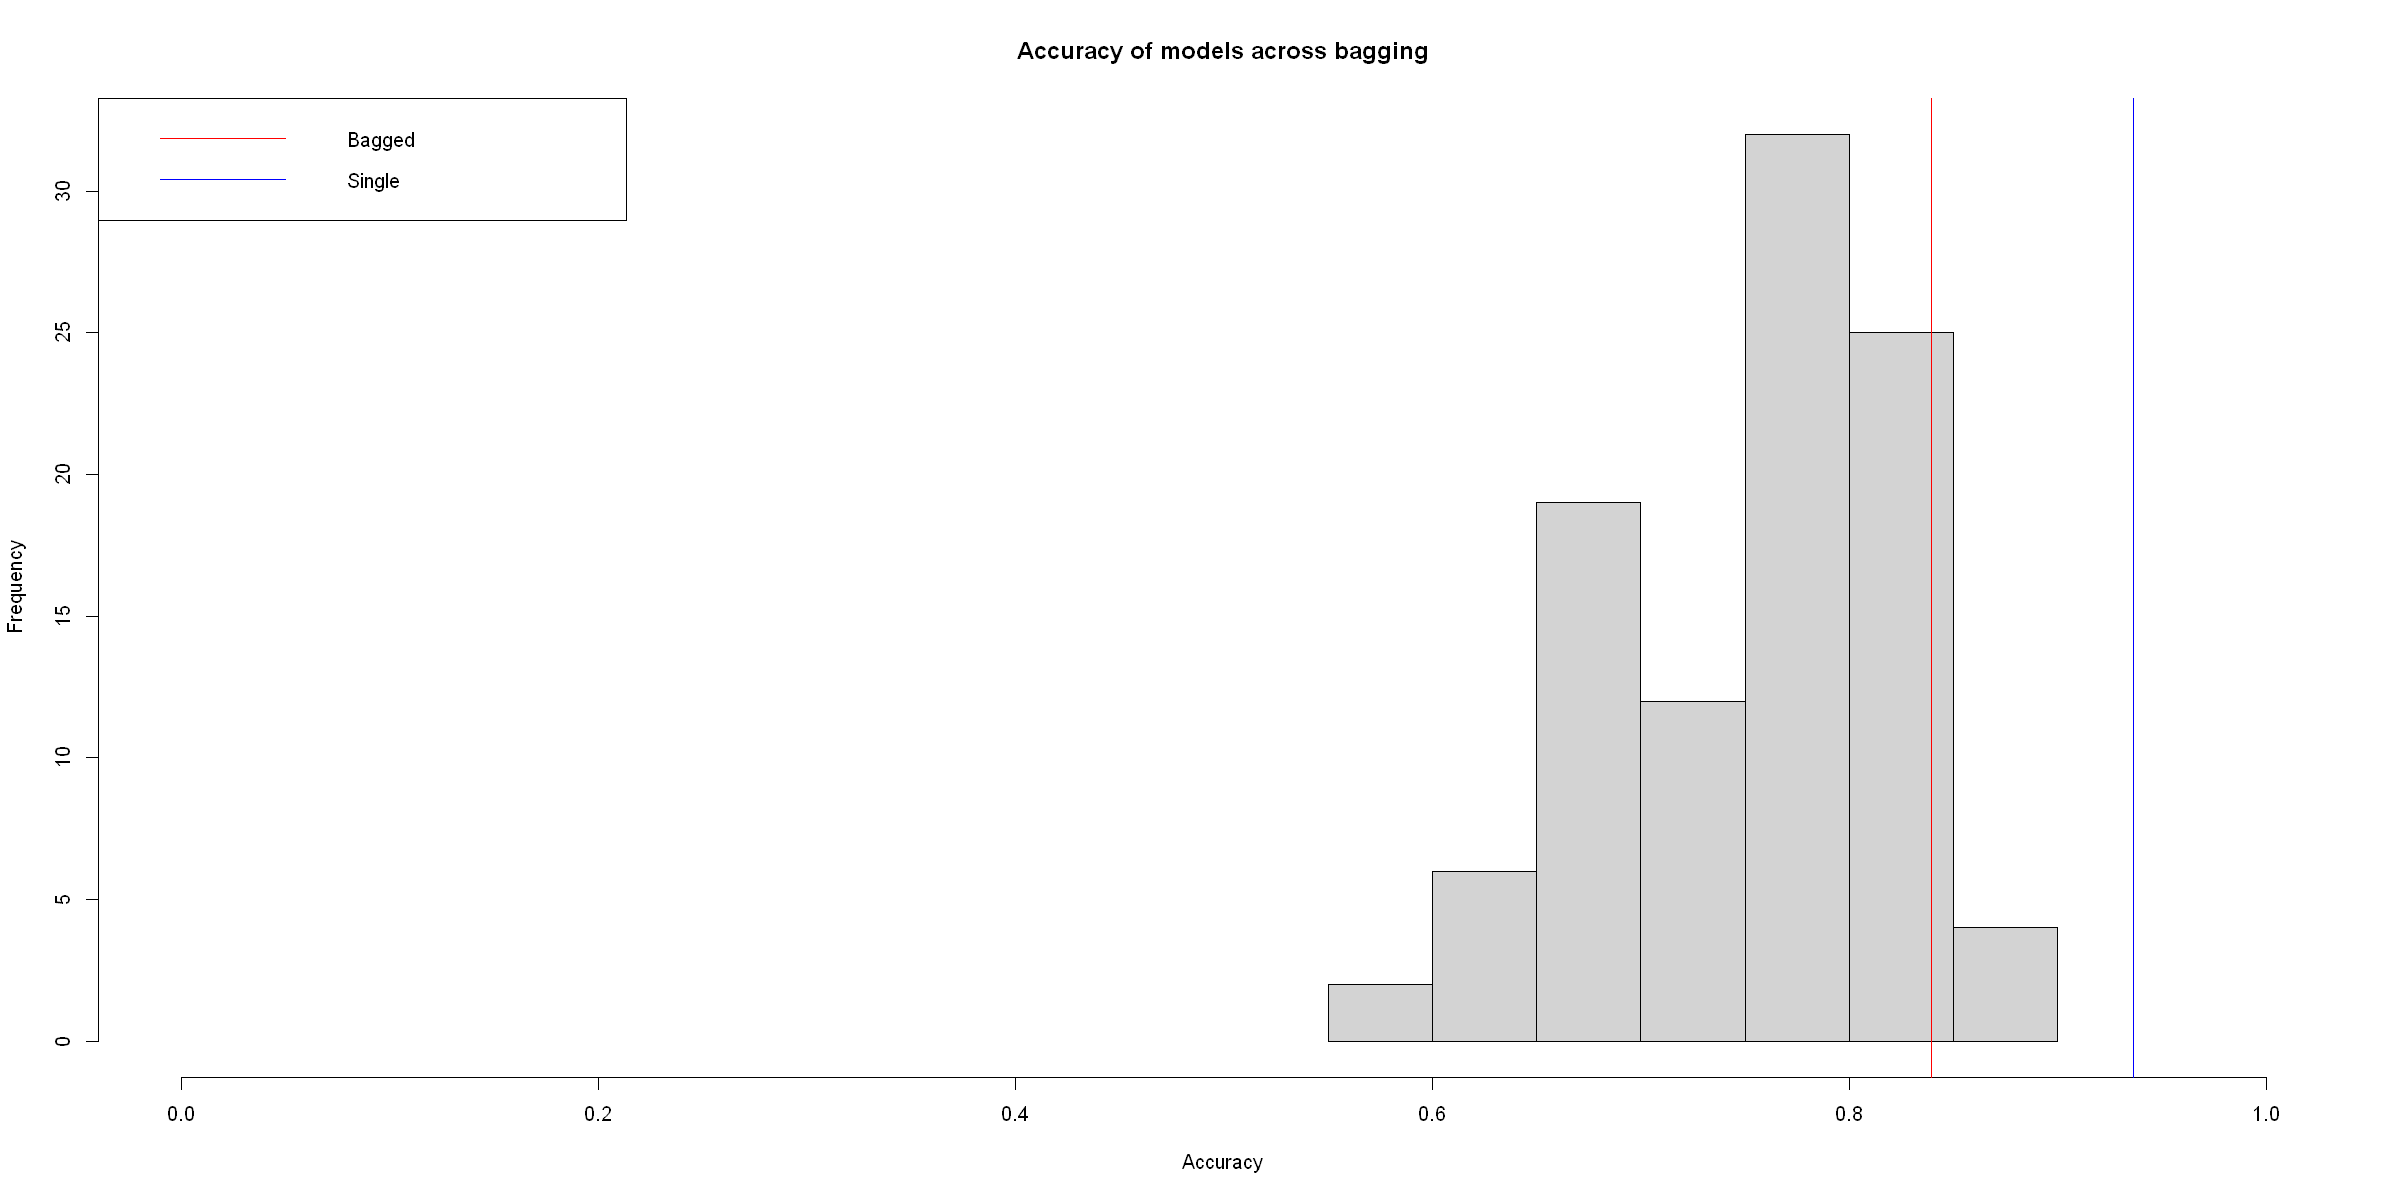

In [25]:
hist(results$bagging_accuracies,main='Accuracy of models across bagging',xlab="Accuracy",xlim=c(0,1))
abline(v=results$accuracy_bagged,col="red")
abline(v=results$accuracy_simple,col="blue")
legend("topleft",legend=c("Bagged","Single"),col=c("red","blue"),lty=c(1,1))

In [172]:
n_bagging_resamples <- 10
hidden_nodes_vec <- c(3,5,10,15,30,50,100)
#hidden_nodes_vec <- c(3,5,10)

accuracy_bagged_vec <- numeric()
accuracy_simple_vec <- numeric()

for(hidden_nodes in hidden_nodes_vec){
    print(paste("[INFO] - Testing h=",hidden_nodes))
    results <- BaggingNN(hidden_nodes = hidden_nodes,n_bagging_resamples = n_bagging_resamples)
    accuracy_bagged_vec <- c(accuracy_bagged_vec,results$accuracy_bagged)
    accuracy_simple_vec <- c(accuracy_simple_vec,results$accuracy_simple)
}

data.frame(HiddenNodes=hidden_nodes_vec,AccuracyBagged=accuracy_bagged_vec,AccuracySimple=accuracy_simple_vec)

[1] "[INFO] - Testing h= 3"
[1] "[INFO] - Confusion matrix bagged model :"
         Y
Y_hat     nonspam spam
  nonspam    1261  134
  spam        136  770
[1] "[INFO] - Accuracy bagged model : 0.882659713168188"
[1] "[INFO] - Misclassification rate bagged model : 0.117340286831812"
[1] "[INFO] - Confusion matrix single model :"
         Y
Y_hat     nonspam spam
  nonspam    1304   70
  spam         93  834
[1] "[INFO] - Accuracy single model : 0.92916123424598"
[1] "[INFO] - Misclassification rate single model : 0.07083876575402"
[1] "[INFO] - Testing h= 5"
[1] "[INFO] - Confusion matrix bagged model :"
         Y
Y_hat     nonspam spam
  nonspam    1281  245
  spam        116  659
[1] "[INFO] - Accuracy bagged model : 0.843111690569318"
[1] "[INFO] - Misclassification rate bagged model : 0.156888309430682"
[1] "[INFO] - Confusion matrix single model :"
         Y
Y_hat     nonspam spam
  nonspam    1351   89
  spam         46  815
[1] "[INFO] - Accuracy single model : 0.94132985658409

HiddenNodes,AccuracyBagged,AccuracySimple
<dbl>,<dbl>,<dbl>
3,0.8826597,0.9291612
5,0.8431117,0.9413299
10,0.8105172,0.9278575
15,0.7631465,0.9222077
30,0.7953064,0.9304650
50,0.7770535,0.9209040
100,0.7535854,0.9400261


In [173]:
saveRDS(data.frame(HiddenNodes=hidden_nodes_vec,AccuracyBagged=accuracy_bagged_vec,AccuracySimple=accuracy_simple_vec),"BaggingNNResults.rds")

## Bonus - RSNNS

In [82]:
data(spam)
set.seed(1717)
spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

data <- spam[,-target_variable]

#maxs <- apply(data, 2, max) 
#mins <- apply(data, 2, min)
#scaled <- as.data.frame(scale(data, center = mins, scale = maxs - mins))

scaled <- scale(data)

train_data <- scaled[spam_idx[1:half_split],]
train_label <- spam[spam_idx[1:half_split],target_variable]
test_data <- scaled[spam_idx[(half_split+1):nrow(spam)],]
test_label <- spam[spam_idx[(half_split+1):nrow(spam)],target_variable]
threshold <- 0.5

#centers <- c(5,10,15,20,30,50,100,150,200)
centers <- c(50)
accuracy_vec <- numeric()

for(center in centers){
  
  rbfn_model <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           size=20, 
                           maxit=1000)

  
  Y_pred_rbfn <- predict(rbfn_model, test_data)
  Y_hat_rbfn <- ifelse(Y_pred_rbfn[,2] > threshold,"spam","nonspam")
  accuracy <- computeResults(Y,Y_hat_rbfn,"Radial Basis Function Network")
  accuracy_vec <- cbind(accuracy_vec,accuracy)
}

         test_label
          nonspam spam
  nonspam    1163  403
  spam        234  501
[1] "[INFO] - Misclassification Rate - RSNNS: 0.27683615819209"


In [161]:
BaggingRBF <- function(hidden_nodes=5,n_bagging_resamples=10,threshold=0.5){
    data(spam)
    half_split <- floor(nrow(spam)/2)
    target_variable <- ncol(spam)
    accuracy_vec <- c()
    
    # 1. Shuffle the dataset randomly.
    set.seed(1717)
    spam_idx <- sample(1:nrow(spam))
    
    # 2. Normalize dataset
    data <- spam[,-target_variable]
    scaled <- scale(data)

    # 3. Split shuffled dataset into training and test set
    train_data <- scaled[spam_idx[1:half_split],]
    train_label <- spam[spam_idx[1:half_split],target_variable]
    test_data <- scaled[spam_idx[(half_split+1):nrow(spam)],]
    test_label <- spam[spam_idx[(half_split+1):nrow(spam)],target_variable]
   

    n_train <- dim(train_data)[1]
    Y_pred_models<-numeric()
    Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
    Y <- test_label
    accuracy_vec<-array(0,c(1,n_bagging_resamples))

    for (i in 1:n_bagging_resamples)
    {
      # 1. Resample data from the training set
      I_bag <- sample(seq(1,n_train),replace=TRUE)
      # 2. Fit model
      model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=100, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
      Y_pred <- predict(model,test_data)
      Y_pred_models <- cbind(Y_pred_models,ifelse(Y_pred[,2] > threshold,1,0))
      accuracy_vec[i] <- computeResults(Y,ifelse(Y_pred[,2] > threshold,"spam","nonspam"),paste(i,"th model"),verbose=F)
    }

    # 3. Majority vote of the classifiers to make the prediction
    # Computation trick : With classes being 0/1 if there is a majority of 1 classes, 
    # the sum of all the values should be greater than the number of models/2
    Y_pred_bagged <- as.numeric(apply(Y_pred_models,1,sum) > (n_bagging_resamples/2))

    #Y_pred_bagged <- apply(Y_pred_models,1,mean)
    Y_hat_bagged <- ifelse(Y_pred_bagged,"spam","nonspam")
    accuracy_bag <- computeResults(Y,Y_hat_bagged,"bagged model",verbose=F)
    
    model_single_out <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(train_label),
                           #nOutputs=2,
                           size=hidden_nodes, 
                           maxit=100, 
                           #initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           #initFunc="RBF_Weights_Kohonen",
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)

    Y_pred_single_out <- predict(model_single_out,test_data)
    Y_hat_single_out <- ifelse(Y_pred_single_out[,2] > threshold,"spam","nonspam")
    accuracy_single_out <- computeResults(Y,Y_hat_single_out,"single model")
    return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec))
}

In [169]:
BaggingRBF(hidden_nodes=50,n_bagging_resamples=100)

[1] "[INFO] - Confusion matrix bagged model :"
         Y
Y_hat     nonspam spam
  nonspam    1347  139
  spam         50  765
[1] "[INFO] - Accuracy bagged model : 0.917861799217731"
[1] "[INFO] - Misclassification rate bagged model : 0.0821382007822686"
[1] "[INFO] - Confusion matrix single model :"
         Y
Y_hat     nonspam spam
  nonspam    1347  133
  spam         50  771
[1] "[INFO] - Accuracy single model : 0.920469361147327"
[1] "[INFO] - Misclassification rate single model : 0.0795306388526728"


0.9065624,0.8943937,0.916558,0.9148196,0.9078661,0.9126467,0.9191656,0.9222077,0.9139505,0.9052586,...,0.8991743,0.9109083,0.9078661,0.8687527,0.9009126,0.9100391,0.8274663,0.9104737,0.9043894,0.9156888


In [170]:
n_bagging_resamples <- 10
hidden_nodes_vec <- c(3,5,10,15,30,50,100)
#hidden_nodes_vec <- c(3,5,10)

accuracy_bagged_vec <- numeric()
accuracy_simple_vec <- numeric()

for(hidden_nodes in hidden_nodes_vec){
    print(paste("[INFO] - Testing h=",hidden_nodes))
    results <- BaggingRBF(hidden_nodes = hidden_nodes,n_bagging_resamples = n_bagging_resamples)
    accuracy_bagged_vec <- c(accuracy_bagged_vec,results$accuracy_bagged)
    accuracy_simple_vec <- c(accuracy_simple_vec,results$accuracy_simple)
}


[1] "[INFO] - Testing h= 3"
[1] "[INFO] - Confusion matrix bagged model :"
         Y
Y_hat     nonspam spam
  nonspam    1394  799
  spam          3  105
[1] "[INFO] - Accuracy bagged model : 0.651455888744024"
[1] "[INFO] - Misclassification rate bagged model : 0.348544111255976"
[1] "[INFO] - Confusion matrix single model :"
         Y
Y_hat     nonspam spam
  nonspam    1303  685
  spam         94  219
[1] "[INFO] - Accuracy single model : 0.661451542807475"
[1] "[INFO] - Misclassification rate single model : 0.338548457192525"
[1] "[INFO] - Testing h= 5"
[1] "[INFO] - Confusion matrix bagged model :"
         Y
Y_hat     nonspam spam
  nonspam    1357  352
  spam         40  552
[1] "[INFO] - Accuracy bagged model : 0.829639287266406"
[1] "[INFO] - Misclassification rate bagged model : 0.170360712733594"
[1] "[INFO] - Confusion matrix single model :"
         Y
Y_hat     nonspam spam
  nonspam    1264  406
  spam        133  498
[1] "[INFO] - Accuracy single model : 0.765754019991

HiddenNodes,AccuracyBagged,AccuracySimple
<dbl>,<dbl>,<dbl>
3,0.6514559,0.6614515
5,0.8296393,0.7657540
10,0.8574533,0.8491960
15,0.8739678,0.8604954
30,0.9039548,0.8991743
50,0.9182964,0.9200348
100,0.9235115,0.9126467


In [171]:
saveRDS(data.frame(HiddenNodes=hidden_nodes_vec,AccuracyBagged=accuracy_bagged_vec,AccuracySimple=accuracy_simple_vec),"BaggingRBFResults.rds")

## Bonus - Caret

In [26]:
spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]
threshold <- 0.5

In [27]:
library(caret)
fitControl <- trainControl(## 3-fold CV
                           method = "cv",
                           number = 3)

Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.4"

Attaching package: 'ggplot2'


The following object is masked from 'package:kernlab':

    alpha



Attaching package: 'caret'


The following objects are masked from 'package:RSNNS':

    confusionMatrix, train




In [28]:
parameterGrid <-  expand.grid(decay=0,
                              size=c(3,5,10,15,20,50))

                        
parameterGrid

model_caret <- train(type ~ ., data = train_data, 
                 method = "nnet", 
                 trControl = fitControl, 
                 verbose = FALSE,
                 skip=FALSE,
                 maxit=10000,
                 trace=F,
                 rang=0.2,
                 MaxNWts=10000,
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)
model_caret

decay,size
<dbl>,<dbl>
0,3
0,5
0,10
0,15
0,20
0,50


Neural Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1534, 1533, 1533 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   3    0.9126109  0.8163074
   5    0.9226134  0.8365969
  10    0.9043554  0.7988075
  15    0.9195690  0.8301858
  20    0.9121775  0.8153492
  50    0.9130444  0.8180782

Tuning parameter 'decay' was held constant at a value of 0
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.

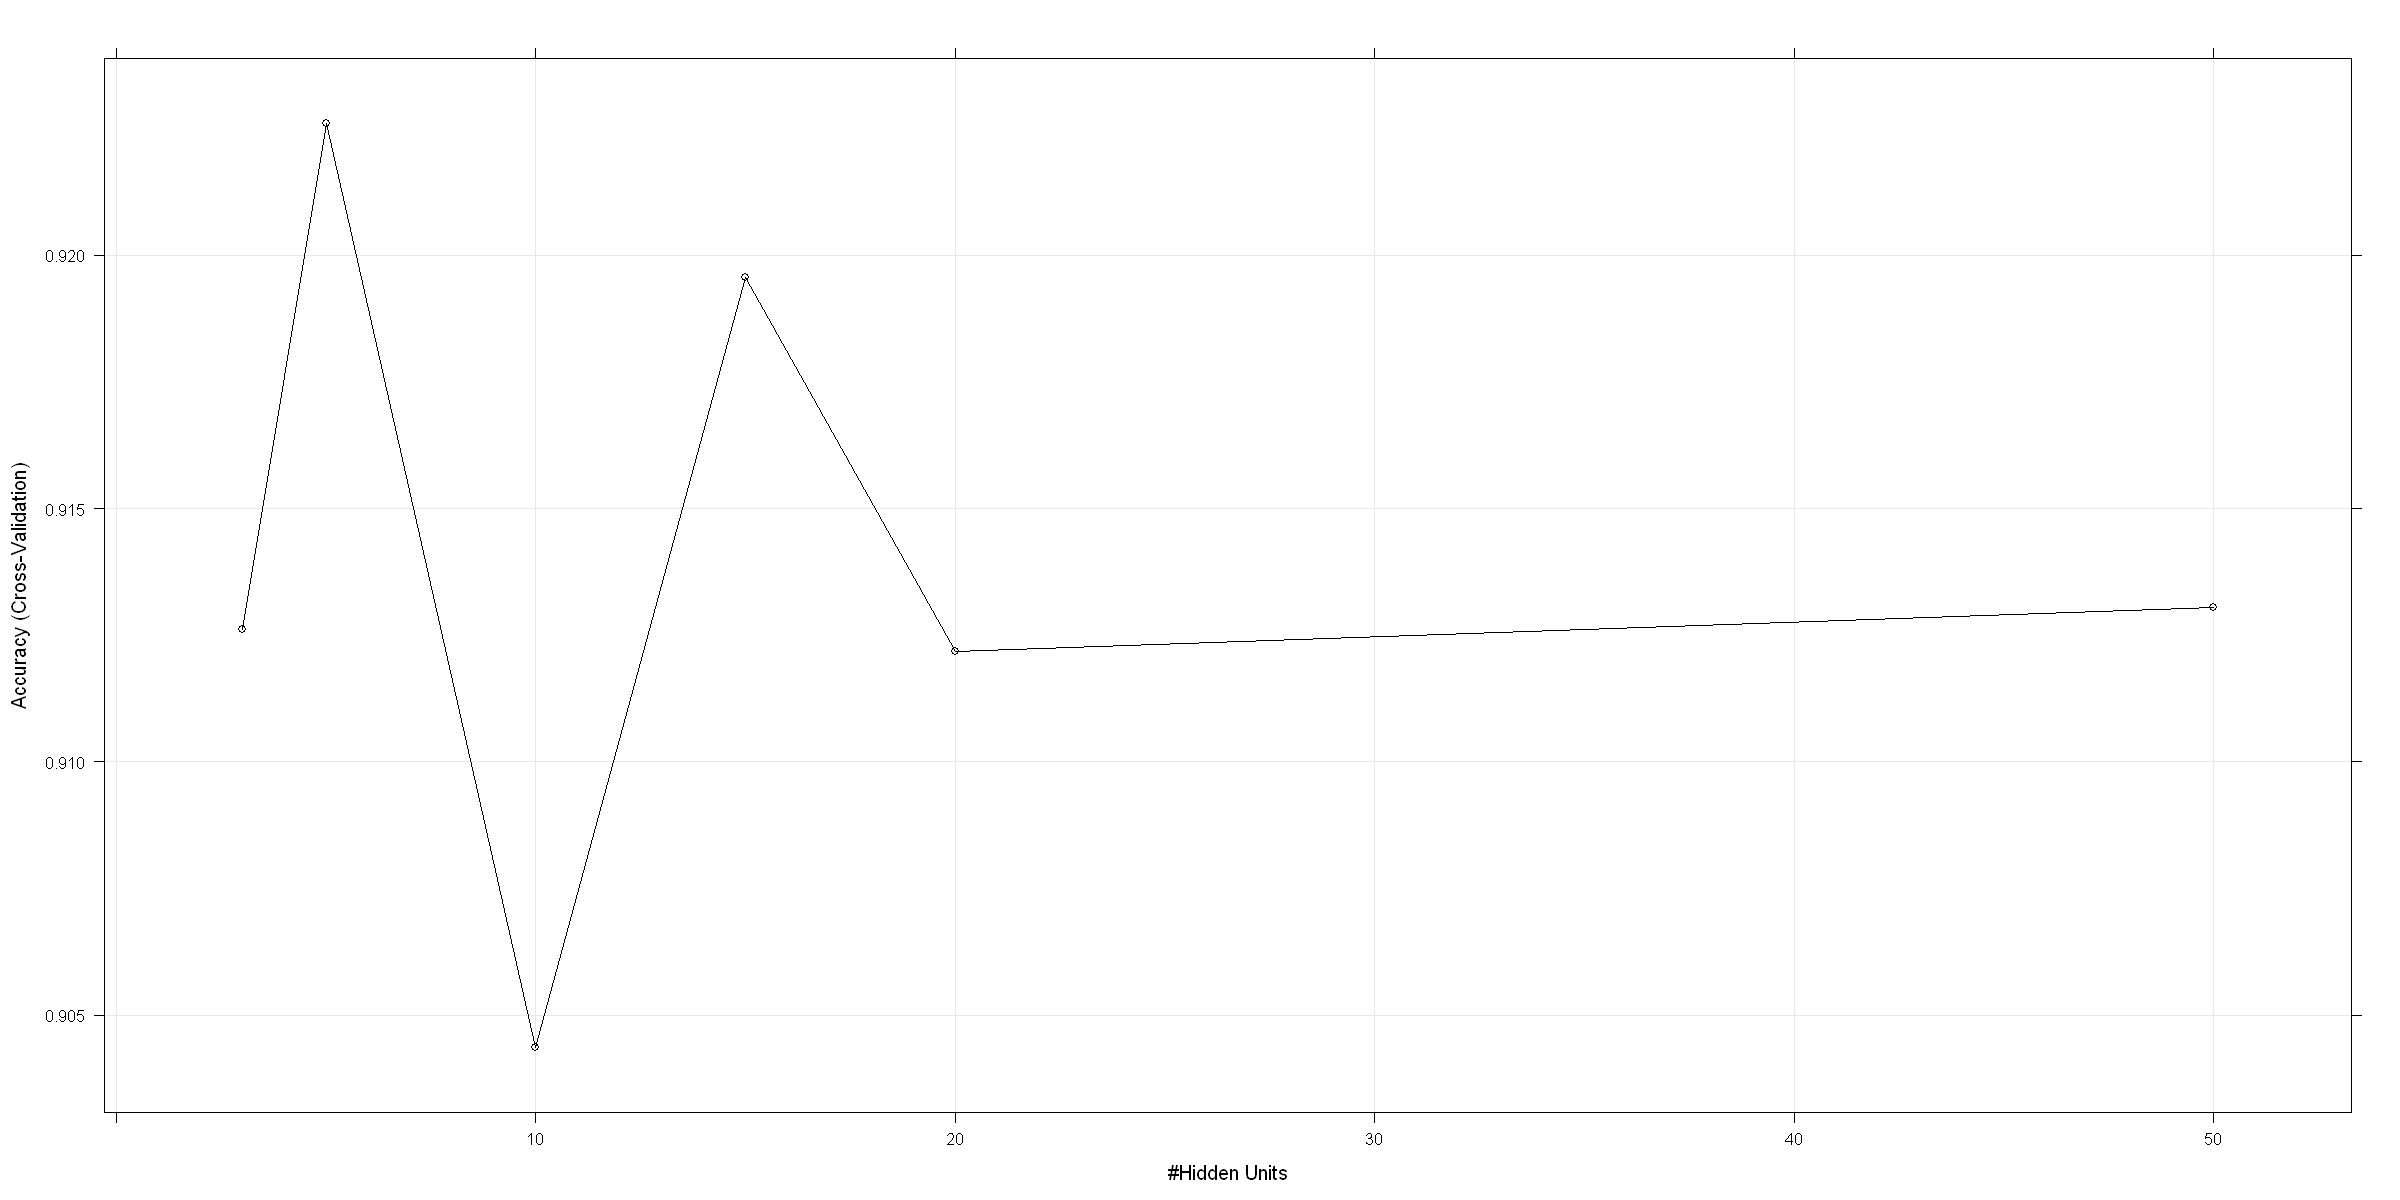

In [29]:
trellis.par.set(caretTheme())
plot(model_caret)
saveRDS(model_caret,"model_caret.rds")

In [30]:
model_caret$

a 57-5-1 network with 296 weights
inputs: make address all num3d our over remove internet order mail receive will people report addresses free business email you credit your font num000 money hp hpl george num650 lab labs telnet num857 data num415 num85 technology num1999 parts pm direct cs meeting original project re edu table conference charSemicolon charRoundbracket charSquarebracket charExclamation charDollar charHash capitalAve capitalLong capitalTotal 
output(s): .outcome 
options were - entropy fitting 

In [5]:
parameterGrid <-  expand.grid(decay=0,
                              size=c(3,5,10,15,20,50))
                        
parameterGrid

preProcValues <- preProcess(train_data, method = c("center", "scale"))

model_caret_scaled <- train(type ~ ., data = predict(preProcValues,train_data), 
                 method = "nnet", 
                 trControl = fitControl, 
                 verbose = FALSE,
                 skip=FALSE,
                 maxit=10000,
                 trace=F,
                 rang=0.2,
                 MaxNWts=10000,
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

preProcValues <- preProcess(train_data, method = c("range"))

model_caret_ranged <- train(type ~ ., data = predict(preProcValues,train_data), 
                 method = "nnet", 
                 trControl = fitControl, 
                 verbose = FALSE,
                 skip=FALSE,
                 maxit=10000,
                 trace=F,
                 rang=0.2,
                 MaxNWts=10000,
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)


model_caret_raw <- train(type ~ ., data=train_data, 
                 method = "nnet", 
                 trControl = fitControl, 
                 verbose = FALSE,
                 skip=FALSE,
                 maxit=10000,
                 trace=F,
                 rang=0.2,
                 MaxNWts=10000,
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

model_caret_scaled
model_caret_ranged
model_caret_raw

decay,size
<dbl>,<dbl>
0,3
0,5
0,10
0,15
0,20
0,50


Neural Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1533, 1533, 1534 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   3    0.9082588  0.8095284
   5    0.9182589  0.8278818
  10    0.8939075  0.7785047
  15    0.9008695  0.7938400
  20    0.8908620  0.7714607
  50    0.8960890  0.7827264

Tuning parameter 'decay' was held constant at a value of 0
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.

Neural Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1534, 1532, 1534 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   3    0.9065152  0.8034519
   5    0.9117428  0.8163216
  10    0.9034792  0.7967564
  15    0.8973859  0.7846249
  20    0.9021828  0.7953906
  50    0.9056539  0.8012454

Tuning parameter 'decay' was held constant at a value of 0
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.

Neural Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1534, 1533, 1533 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   3    0.8130844  0.5442253
   5    0.9239166  0.8393957
  10    0.9256504  0.8433939
  15    0.9139147  0.8188729
  20    0.9169580  0.8252075
  50    0.9173932  0.8261491

Tuning parameter 'decay' was held constant at a value of 0
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 10 and decay = 0.

In [6]:
parameterGrid <-  expand.grid(size=c(3,5,10,15,20,50))
                        
parameterGrid

preProcValues <- preProcess(train_data, method = c("center", "scale"))

model_caret_scaled <- train(type ~ ., data = predict(preProcValues,train_data), 
                 method = "rbf", 
                 trControl = fitControl, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

preProcValues <- preProcess(train_data, method = c("range"))

model_caret_ranged <- train(type ~ ., data = predict(preProcValues,train_data), 
                 method = "rbf", 
                 trControl = fitControl, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

model_caret_raw <- train(type ~ ., data=train_data, 
                 method = "rbf", 
                 trControl = fitControl, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

model_caret_scaled
model_caret_ranged
model_caret_raw

size
<dbl>
3
5
10
15
20
50


Radial Basis Function Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1532, 1534, 1534 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   3    0.7869547  0.5366673
   5    0.8060723  0.5793887
  10    0.8343725  0.6401454
  15    0.8465026  0.6664785
  20    0.8634830  0.7045699
  50    0.8930252  0.7692242

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 50.

Radial Basis Function Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1534, 1533, 1533 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   3    0.7286842  0.3796655
   5    0.7547825  0.4676607
  10    0.6626617  0.2451587
  15    0.7230413  0.4104738
  20    0.7134456  0.3931790
  50    0.6269938  0.2328775

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 5.

Radial Basis Function Network 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1533, 1534, 1533 
Resampling results across tuning parameters:

  size  Accuracy   Kappa        
   3    0.6104356  -0.0003699801
   5    0.6117388   0.0027169299
  10    0.6121740   0.0080201361
  15    0.6121745   0.0085043540
  20    0.6095653   0.0043204976
  50    0.6561037   0.2367872295

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was size = 50.

In [9]:
parameterGrid <-  expand.grid(layer1=c(3,5,10,15,20,50),
                              layer2=5,
                              layer3=2)
                        
parameterGrid

preProcValues <- preProcess(train_data, method = c("center", "scale"))

model_caret_scaled <- train(type ~ ., data = predict(preProcValues,train_data), 
                 method = "mlpML", 
                 trControl = fitControl, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

preProcValues <- preProcess(train_data, method = c("range"))

model_caret_ranged <- train(type ~ ., data = predict(preProcValues,train_data), 
                 method = "mlpML", 
                 trControl = fitControl, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

model_caret_raw <- train(type ~ ., data=train_data, 
                 method = "mlpML", 
                 trControl = fitControl, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = parameterGrid)

model_caret_scaled
model_caret_ranged
model_caret_raw

layer1,layer2,layer3
<dbl>,<dbl>,<dbl>
3,5,2
5,5,2
10,5,2
15,5,2
20,5,2
50,5,2


Multi-Layer Perceptron, with multiple layers 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1533, 1534, 1533 
Resampling results across tuning parameters:

  layer1  Accuracy   Kappa    
   3      0.9286909  0.8505252
   5      0.9221737  0.8365792
  10      0.9173932  0.8276810
  15      0.9265213  0.8447806
  20      0.9252215  0.8438999
  50      0.9278262  0.8483016

Tuning parameter 'layer2' was held constant at a value of 5
Tuning
 parameter 'layer3' was held constant at a value of 2
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were layer1 = 3, layer2 = 5 and layer3 = 2.

Multi-Layer Perceptron, with multiple layers 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1534, 1534, 1532 
Resampling results across tuning parameters:

  layer1  Accuracy   Kappa    
   3      0.6108697  0.0000000
   5      0.6996426  0.2451346
  10      0.6108697  0.0000000
  15      0.7102621  0.2683356
  20      0.8804134  0.7412874
  50      0.7131326  0.2753445

Tuning parameter 'layer2' was held constant at a value of 5
Tuning
 parameter 'layer3' was held constant at a value of 2
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were layer1 = 20, layer2 = 5 and layer3 = 2.

Multi-Layer Perceptron, with multiple layers 

2300 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1533, 1533, 1534 
Resampling results across tuning parameters:

  layer1  Accuracy   Kappa       
   3      0.6108696   0.000000000
   5      0.6108696   0.000000000
  10      0.6108696   0.000000000
  15      0.6108696   0.000000000
  20      0.6108696   0.000000000
  50      0.6091312  -0.003466531

Tuning parameter 'layer2' was held constant at a value of 5
Tuning
 parameter 'layer3' was held constant at a value of 2
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were layer1 = 3, layer2 = 5 and layer3 = 2.